# IMPORTING THE IMAGES AND MAKING A SAMPLE DATASET

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
#importing the main folder and excel file
data_dir = '/content/drive/MyDrive/Eye/'
excel = pd.read_csv(data_dir+'data_information (1).csv')
#dividing it into 3 folders
cnv=excel[(excel['Class']=='CNV') & (excel['Label']=='CNV')]
normal=excel[(excel['Class']=='CNV') & (excel['Label']=='NORMAL')]
drusen = excel[(excel['Class']=='DRUSEN') & (excel['Label']=='DRUSEN')]
#making a sampled dataset which contain 300 images
cnv_subset = cnv.sample(n=400,random_state=42)
normal_subset = normal.sample(n=400,random_state=42)
drusen_subset = drusen.sample(n=400,random_state=42)
sampled_data = pd.concat([cnv_subset, normal_subset, drusen_subset], ignore_index=True)
drusen = pd.concat([normal_subset, drusen_subset], ignore_index=True)
cnv=pd.concat([cnv_subset, normal_subset], ignore_index=True)
both=pd.concat([cnv_subset, drusen_subset], ignore_index=True)

<ipython-input-4-843d22d6f480>:32: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(threshold_image, visualize=True, multichannel=False, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  re

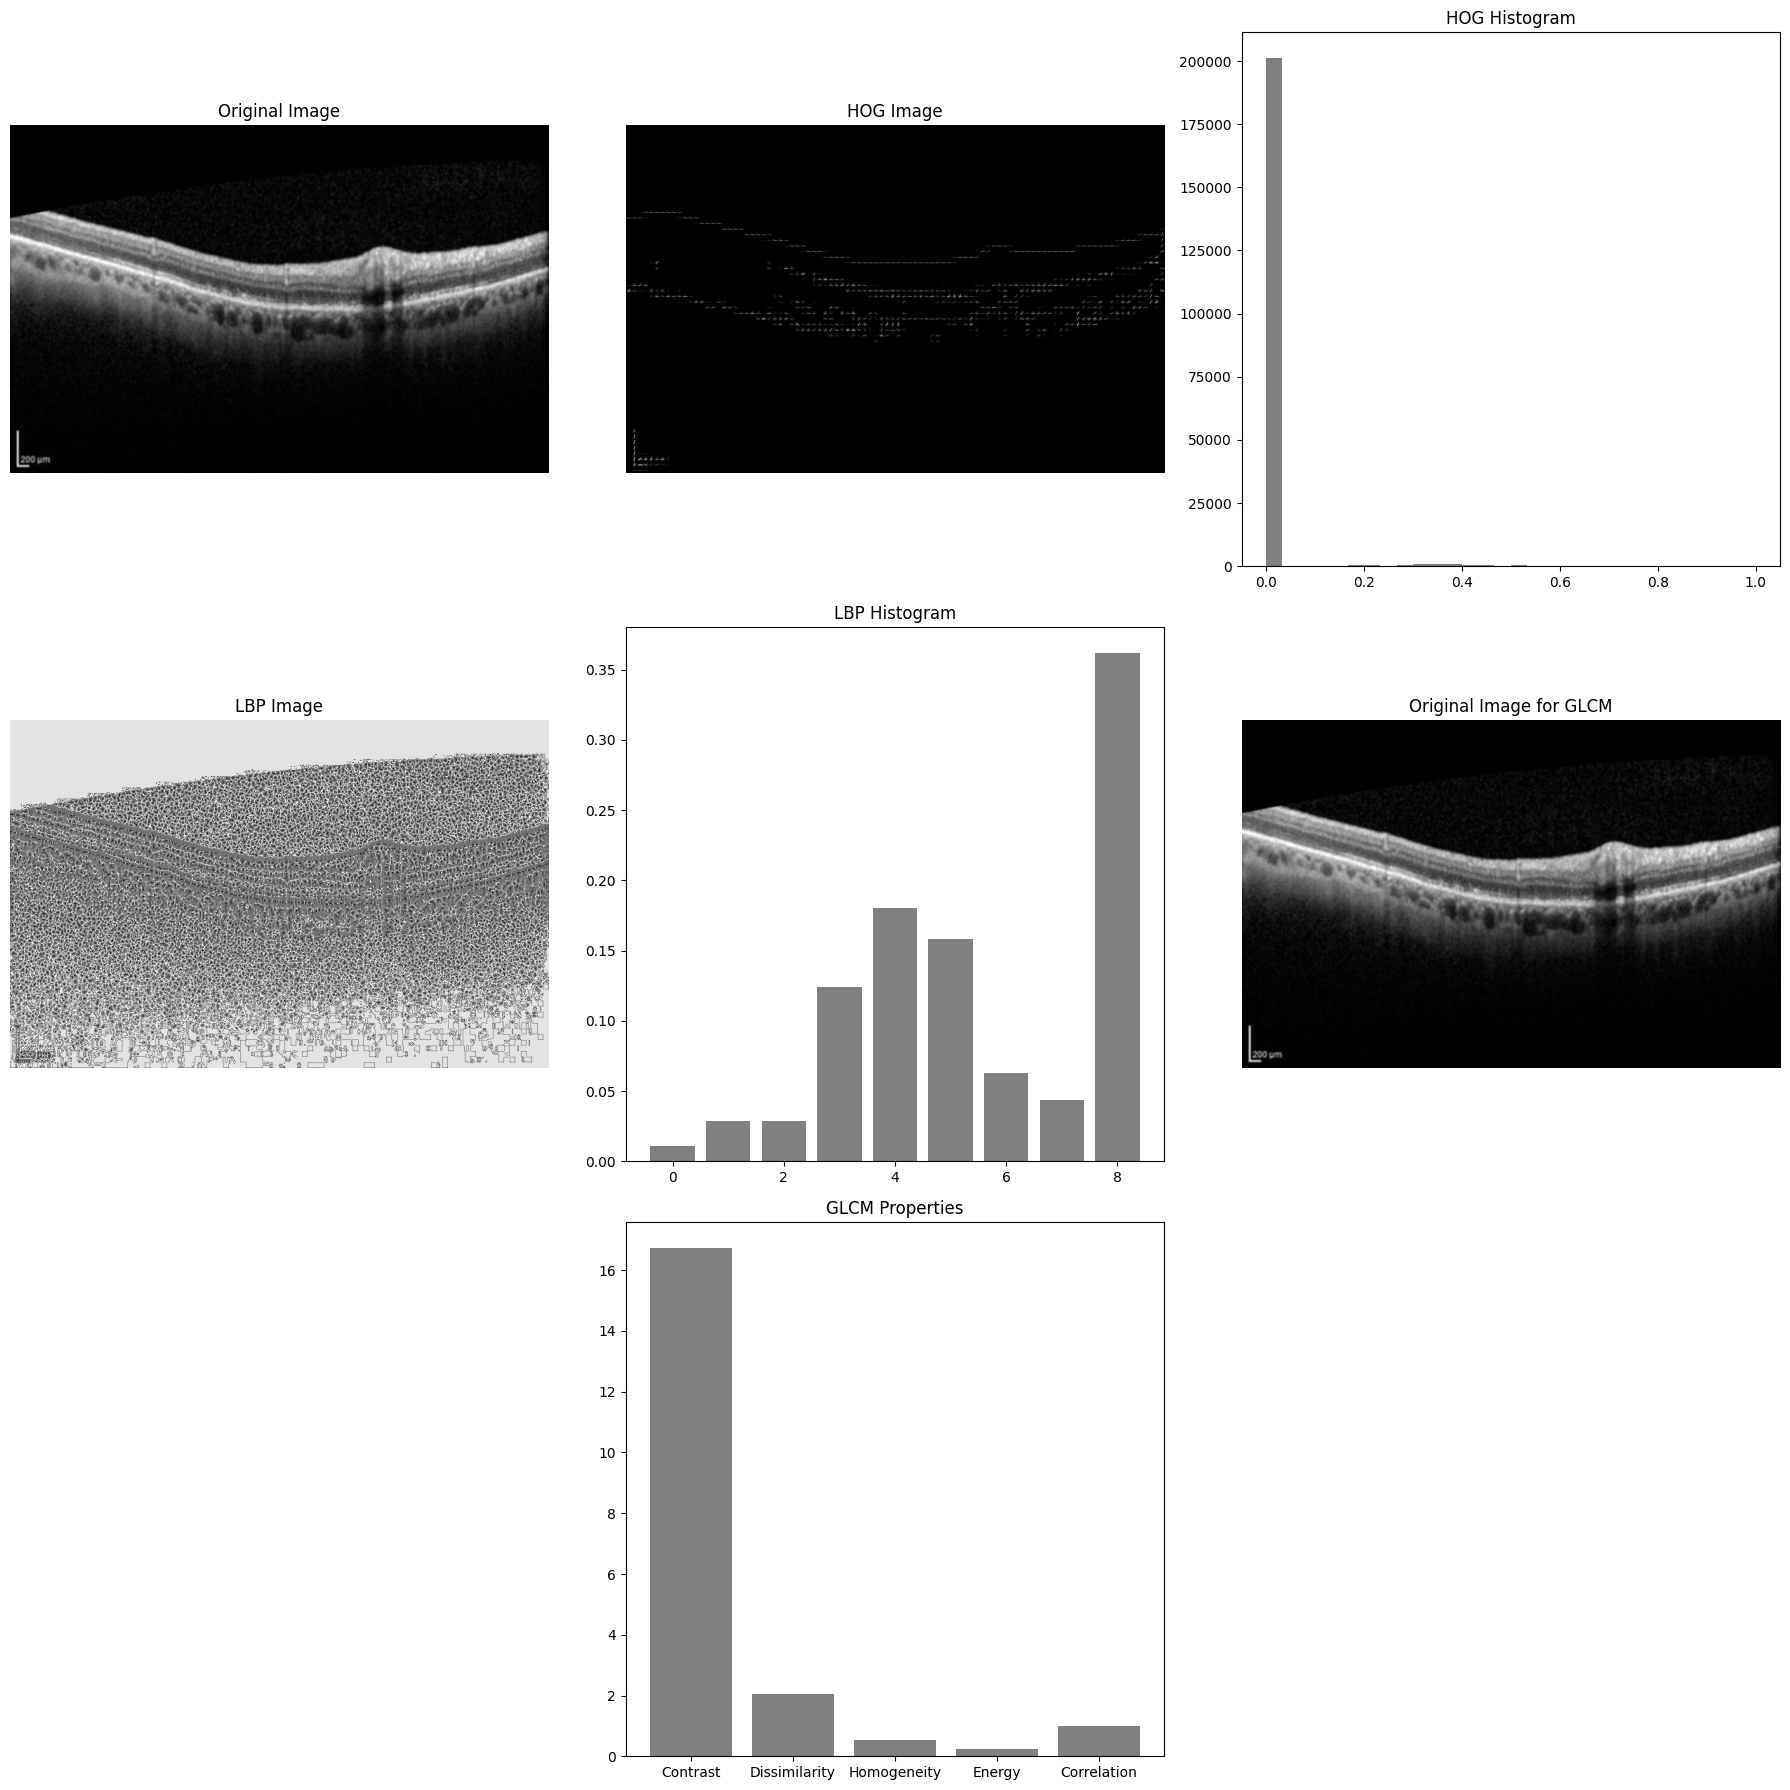

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.feature import hog, local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import threshold_otsu

# Define data directory
data_dir = '/content/drive/MyDrive/Eye/Filtered/'

# Select an example image
example_image_path = os.path.join(data_dir, 'example_image.png')  # Replace with your image path

# Check if the example image exists, if not select a random image from the directory
if not os.path.exists(example_image_path) or not os.path.isfile(example_image_path):
    all_images = [f for f in os.listdir(data_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if not all_images:
        raise FileNotFoundError("No images found in the specified directory.")
    example_image_path = os.path.join(data_dir, random.choice(all_images))

# Load the example image
image = cv2.imread(example_image_path)
if image is None:
    raise FileNotFoundError(f"Failed to load image at {example_image_path}")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract HOG features
threshold_value = threshold_otsu(gray_image)
threshold_image = gray_image > threshold_value
features, hog_image = hog(threshold_image, visualize=True, multichannel=False, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Extract LBP features
lbp_image = local_binary_pattern(gray_image, P=8, R=1, method='uniform')
lbp_hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, 10), range=(0, 9))
lbp_hist = lbp_hist.astype("float")
lbp_hist /= (lbp_hist.sum() + 1e-7)

# Extract GLCM features
glcm = greycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
contrast = greycoprops(glcm, 'contrast')[0, 0]
dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
energy = greycoprops(glcm, 'energy')[0, 0]
correlation = greycoprops(glcm, 'correlation')[0, 0]
glcm_features = [contrast, dissimilarity, homogeneity, energy, correlation]

# Plot the results
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Original image
axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# HOG image
axs[0, 1].imshow(hog_image_rescaled, cmap='gray')
axs[0, 1].set_title('HOG Image')
axs[0, 1].axis('off')

# HOG histogram
axs[0, 2].hist(features, bins=30, color='gray')
axs[0, 2].set_title('HOG Histogram')

# LBP image
axs[1, 0].imshow(lbp_image, cmap='gray')
axs[1, 0].set_title('LBP Image')
axs[1, 0].axis('off')

# LBP histogram
axs[1, 1].bar(np.arange(len(lbp_hist)), lbp_hist, color='gray')
axs[1, 1].set_title('LBP Histogram')

# GLCM image (Original Image Again for Context)
axs[1, 2].imshow(gray_image, cmap='gray')
axs[1, 2].set_title('Original Image for GLCM')
axs[1, 2].axis('off')

# GLCM properties histogram
axs[2, 1].bar(['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'], glcm_features, color='gray')
axs[2, 1].set_title('GLCM Properties')

# Hide empty subplots
axs[2, 0].axis('off')
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()

<ipython-input-5-eb68a7183779>:33: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(threshold_image, visualize=True, multichannel=False, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  re

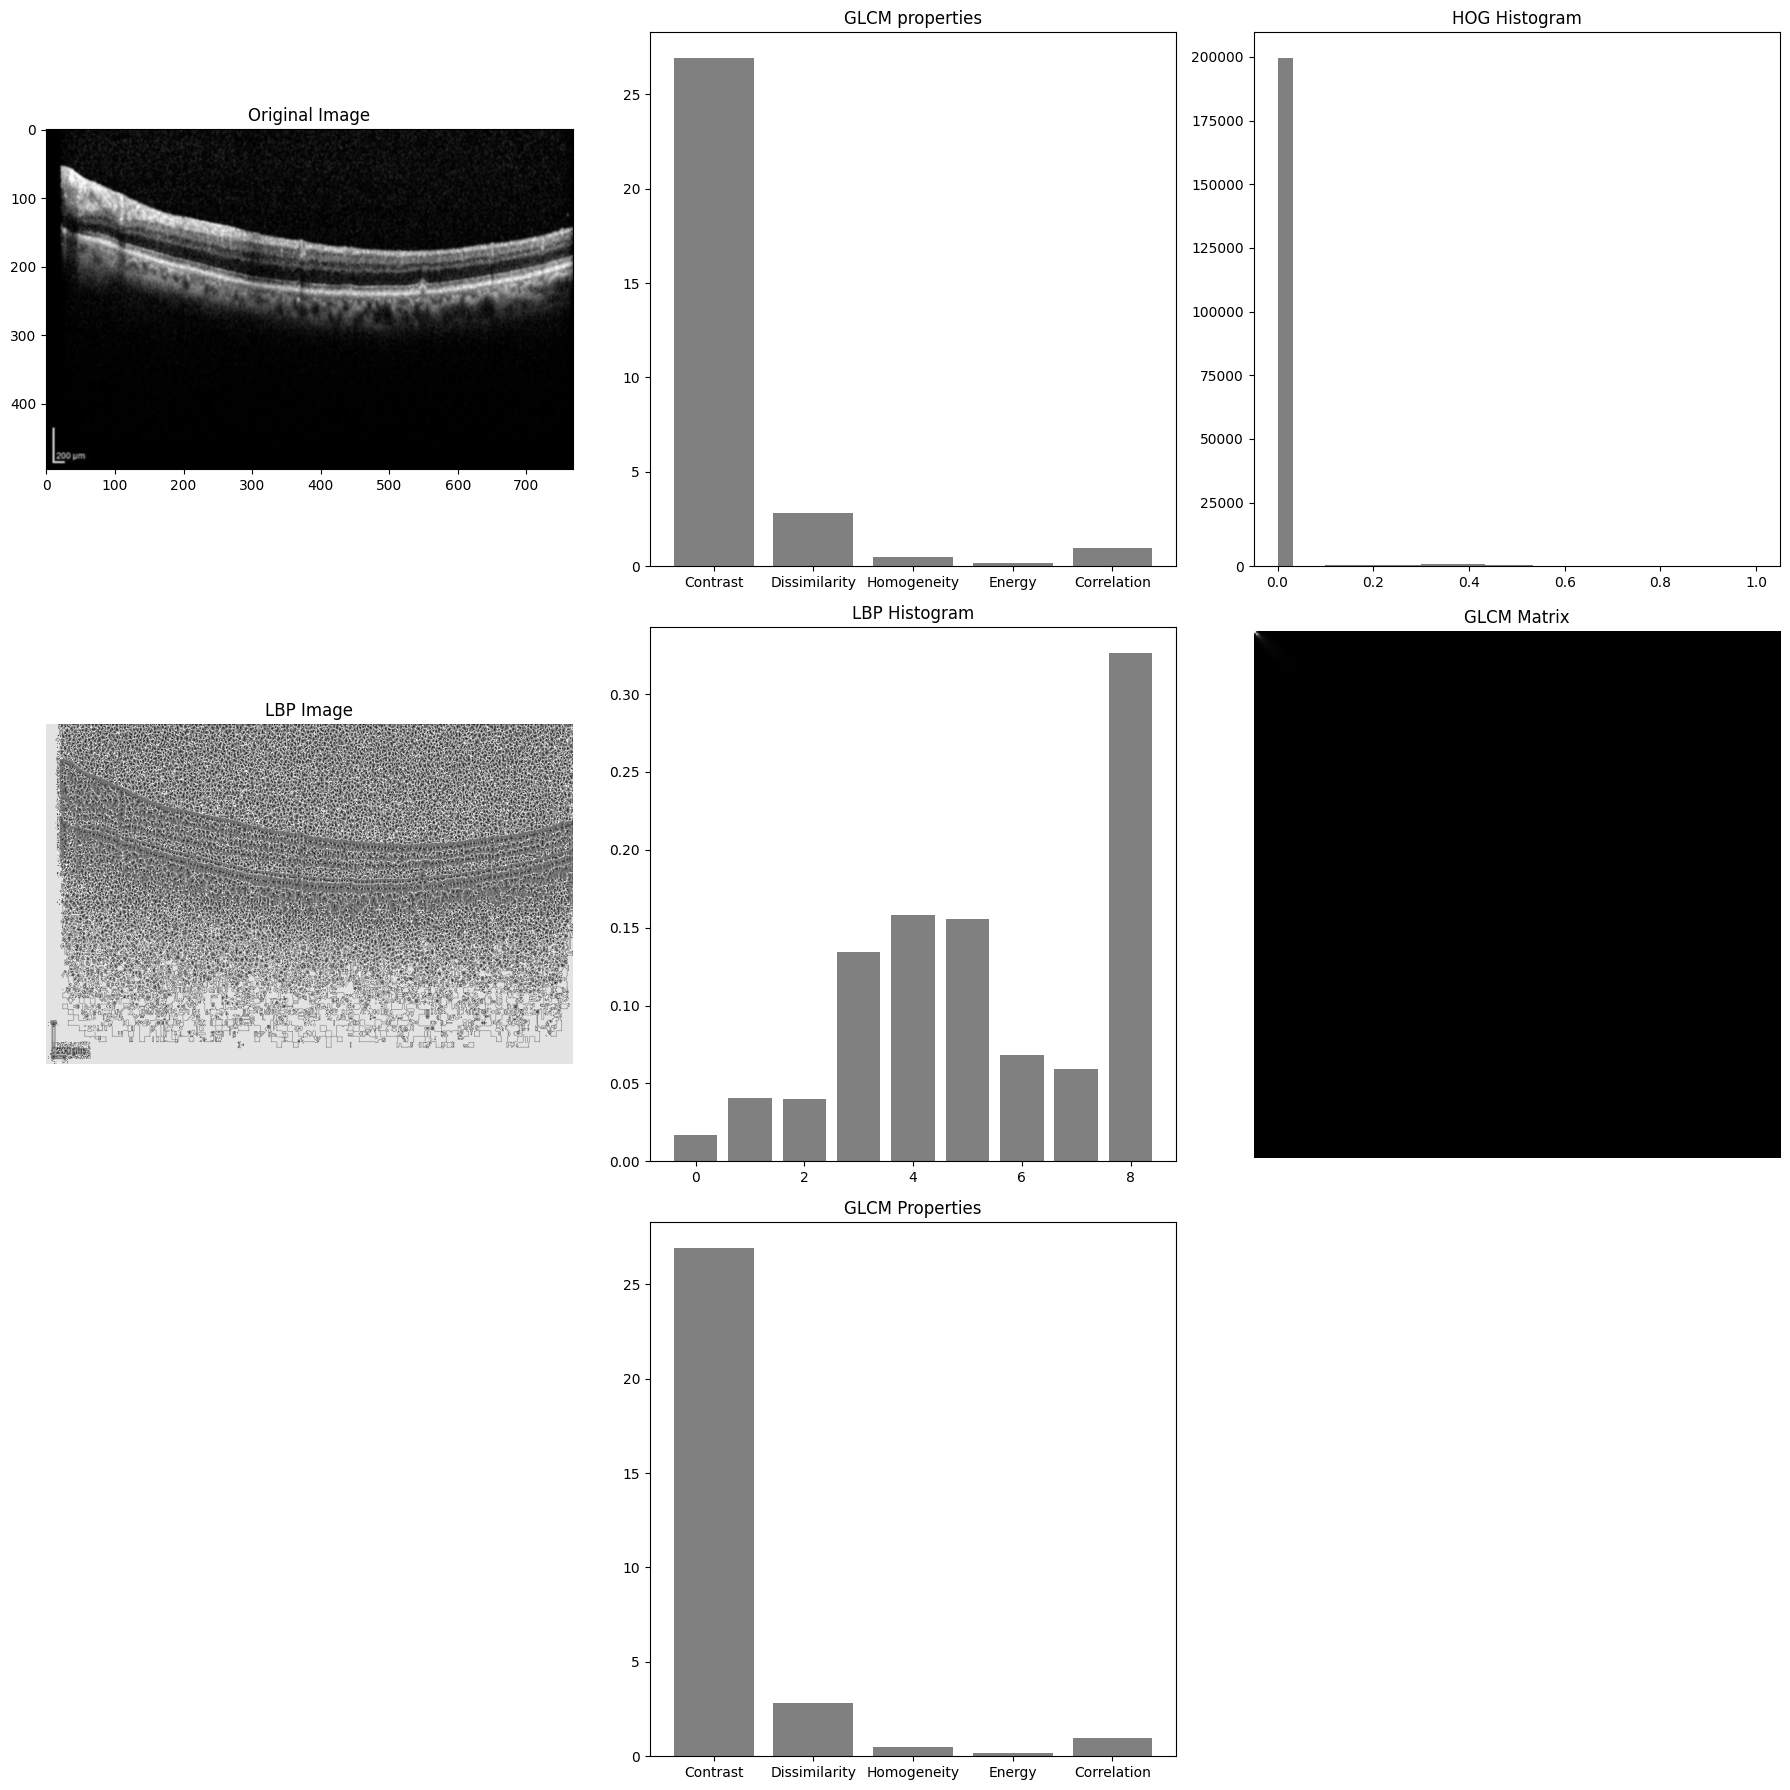

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.feature import hog, local_binary_pattern, greycomatrix, greycoprops
from skimage.filters import threshold_otsu
import random

# Define data directory
data_dir = '/content/drive/MyDrive/Eye/Filtered/'

# Select an example image
example_image_path = os.path.join(data_dir, 'example_image.png')  # Replace with your image path

# Check if the example image exists, if not select a random image from the directory
if not os.path.exists(example_image_path) or not os.path.isfile(example_image_path):
    all_images = [f for f in os.listdir(data_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if not all_images:
        raise FileNotFoundError("No images found in the specified directory.")
    example_image_path = os.path.join(data_dir, random.choice(all_images))

# Load the example image
image = cv2.imread(example_image_path)
if image is None:
    raise FileNotFoundError(f"Failed to load image at {example_image_path}")

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract HOG features
threshold_value = threshold_otsu(gray_image)
threshold_image = gray_image > threshold_value
features, hog_image = hog(threshold_image, visualize=True, multichannel=False, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Extract LBP features
lbp_image = local_binary_pattern(gray_image, P=8, R=1, method='uniform')
lbp_hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, 10), range=(0, 9))
lbp_hist = lbp_hist.astype("float")
lbp_hist /= (lbp_hist.sum() + 1e-7)

# Extract GLCM features
glcm = greycomatrix(gray_image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
contrast = greycoprops(glcm, 'contrast')[0, 0]
dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
energy = greycoprops(glcm, 'energy')[0, 0]
correlation = greycoprops(glcm, 'correlation')[0, 0]
glcm_features = [contrast, dissimilarity, homogeneity, energy, correlation]

# Plot the results
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Original image
axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title('Original Image')

# HOG image
axs[0, 1].bar(['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'], glcm_features, color='gray')
axs[0, 1].set_title('GLCM properties')

# HOG histogram
axs[0, 2].hist(features, bins=30, color='gray')
axs[0, 2].set_title('HOG Histogram')

# LBP image
axs[1, 0].imshow(lbp_image, cmap='gray')
axs[1, 0].set_title('LBP Image')
axs[1, 0].axis('off')

# LBP histogram
axs[1, 1].bar(np.arange(len(lbp_hist)), lbp_hist, color='gray')
axs[1, 1].set_title('LBP Histogram')

# GLCM matrix
axs[1, 2].imshow(glcm[:, :, 0, 0], cmap='gray')
axs[1, 2].set_title('GLCM Matrix')
axs[1, 2].axis('off')

# GLCM properties histogram
axs[2, 1].bar(['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation'], glcm_features, color='gray')
axs[2, 1].set_title('GLCM Properties')

# Hide empty subplots
axs[2, 0].axis('off')
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()

# **both**

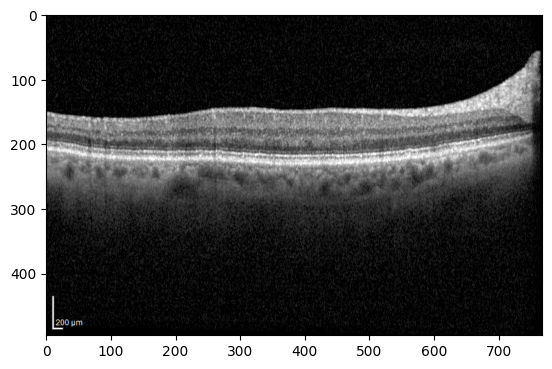

In [ ]:
images=[]
for i in both['Directory']:
  img = cv2.imread(data_dir+i)
  images.append(img)
plt.imshow(img, cmap='gray')

### **PREPROCESSING**

In [ ]:
def apply_minimum_filter(image, kernel_size):
    return cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))
    # Define the directory to save the filtered images
filtered_images_dir = '/content/drive/MyDrive/minfiltered'

kernel_size = 3
# Create the directory if it does not exist
os.makedirs(filtered_images_dir, exist_ok=True)

# Loop over the CNV dataset and filter the images
for index, row in both.iterrows():
    img_path = os.path.join(data_dir, row['Directory'])
    img = cv2.imread(img_path)
    if img is not None:
        filtered_img = apply_minimum_filter(img, kernel_size)

        # Save the filtered image to the filtered images directory
        filtered_img_path = os.path.join(filtered_images_dir, os.path.basename(row['Directory']))
        cv2.imwrite(filtered_img_path, filtered_img)
        print(f"Filtered image saved: {filtered_img_path}")
    else:
        print(f"Error: Unable to read image '{img_path}'")

print("All images filtered and saved successfully.")

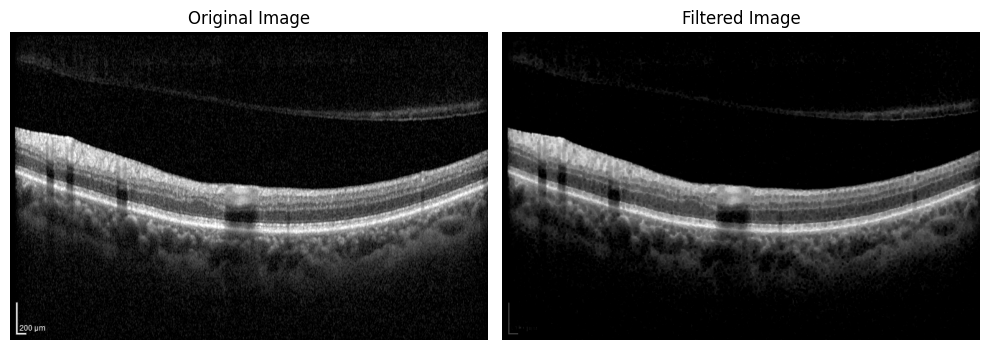

In [ ]:
# Select a random image from the CNV dataset
random_image_row = cnv.sample(n=3, random_state=96).iloc[0]

# Load the selected image
image_path = os.path.join(data_dir, random_image_row['Directory'])
original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply the minimum filter to the image
filtered_img = apply_minimum_filter(original_img, kernel_size)

# Display the original and filtered images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(original_img, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')
axes[1].imshow(filtered_img, cmap='gray')
axes[1].set_title("Filtered Image")
axes[1].axis('off')
plt.tight_layout()
plt.show()

**FEATURE EXTRACTION**

### **LBP**

In [ ]:
import cv2
import numpy as np
import os
from skimage import feature

# Define the directory containing the filtered images
filtered_data_dir = '/content/drive/MyDrive/minfiltered'

# List to store LBP features
lbp_features = []

# Iterate over the rows in the 'Directory' column of cnv
for index, row in both.iterrows():
    # Read the filtered image
    filtered_img_path = os.path.join(filtered_data_dir, os.path.basename(row['Directory']))
    filtered_img = cv2.imread(filtered_img_path)

    # Check if the filtered image was successfully loaded
    if filtered_img is not None:
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)

        # Compute LBP features
        lbp = feature.local_binary_pattern(gray_img, P=8, R=1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 10), range=(0, 9))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)

        # Append LBP features to the list
        lbp_features.append(hist)

# Convert the list of LBP features to a numpy array
lbp_features = np.array(lbp_features)

# Display sample LBP features
print("LBP features shape:", lbp_features.shape)
print("Sample LBP features:")
print(lbp_features[:5])

LBP features shape: (800, 9)
Sample LBP features:
[[0.01530473 0.03433457 0.01198652 0.04531828 0.0320323  0.09375263
  0.03897324 0.01479282 0.71350491]
 [0.01920048 0.04626596 0.01932649 0.06148143 0.05125903 0.13227959
  0.05061586 0.01802965 0.6015415 ]
 [0.01122259 0.02649845 0.01061618 0.03962691 0.04066648 0.08893544
  0.02803154 0.01099683 0.74340558]
 [0.01414178 0.0340458  0.01407878 0.04626859 0.03893387 0.10141024
  0.03843246 0.01367187 0.69901661]
 [0.01738911 0.03543452 0.01170037 0.04141203 0.02951476 0.08532846
  0.03420069 0.01297096 0.7320491 ]]


In [ ]:
# Assuming you have your target vector y as a pandas Series
y = both['Label']

# Encode the target vector
# Assign 0 for DRUSEN, 1 for CNV, and 2 for NORMAL
y_encoded = y.map({'CNV': 0, 'DRUSEN': 1})
X = lbp_features

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5

# Initialize the SVM classifier
svm_classifier = SVC(kernel='sigmoid')

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_dev_accuracy)

Cross-validation scores: [0.48125 0.45625 0.45    0.43125 0.49375]
Mean Accuracy: 0.4625
Standard Deviation of Accuracy: 0.0223606797749979


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
import numpy as np

# Define the values of gamma to try
gamma_values = [0.001, 0.01, 0.1, 1, 10]

# Number of folds for cross-validation
num_folds = 5

# Initialize dictionaries to store mean accuracy and standard deviation for each gamma value
mean_accuracy_dict = {}
std_dev_accuracy_dict = {}

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through gamma values and perform k-fold cross-validation for each
for gamma in gamma_values:
    # Initialize the SVM classifier with RBF kernel
    svm_classifier = SVC(kernel='rbf', gamma=gamma)

    # Perform k-fold cross-validation
    cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)

    # Store mean accuracy and standard deviation
    mean_accuracy = cv_scores.mean()
    std_dev_accuracy = cv_scores.std()

    # Store results in dictionaries
    mean_accuracy_dict[gamma] = mean_accuracy
    std_dev_accuracy_dict[gamma] = std_dev_accuracy

# Print the cross-validation scores for each gamma value
for gamma, mean_accuracy in mean_accuracy_dict.items():
    std_dev_accuracy = std_dev_accuracy_dict[gamma]
    print(f"Gamma: {gamma}, Mean Accuracy: {mean_accuracy}, Standard Deviation: {std_dev_accuracy}")

Gamma: 0.001, Mean Accuracy: 0.46749999999999997, Standard Deviation: 0.023518609652783466
Gamma: 0.01, Mean Accuracy: 0.46749999999999997, Standard Deviation: 0.023518609652783466
Gamma: 0.1, Mean Accuracy: 0.46749999999999997, Standard Deviation: 0.023518609652783466
Gamma: 1, Mean Accuracy: 0.4925, Standard Deviation: 0.04096492402043483
Gamma: 10, Mean Accuracy: 0.4875, Standard Deviation: 0.048733971724044825


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
import numpy as np

# Define the degrees for polynomial kernel
degrees = [2, 3, 4, 5,6]

# Number of folds for cross-validation
num_folds = 5

# Initialize dictionaries to store mean accuracy and standard deviation for each degree
mean_accuracy_dict = {}
std_dev_accuracy_dict = {}

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through degrees and perform k-fold cross-validation for each
for degree in degrees:
    # Initialize the SVM classifier with polynomial kernel
    svm_classifier = SVC(kernel='poly', degree=degree)

    # Perform k-fold cross-validation
    cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)

    # Store mean accuracy and standard deviation
    mean_accuracy = cv_scores.mean()
    std_dev_accuracy = cv_scores.std()

    # Store results in dictionaries
    mean_accuracy_dict[degree] = mean_accuracy
    std_dev_accuracy_dict[degree] = std_dev_accuracy

# Print the cross-validation scores for each degree
for degree, mean_accuracy in mean_accuracy_dict.items():
    std_dev_accuracy = std_dev_accuracy_dict[degree]
    print(f"Degree: {degree}, Mean Accuracy: {mean_accuracy}, Standard Deviation: {std_dev_accuracy}")


Degree: 2, Mean Accuracy: 0.4675000000000001, Standard Deviation: 0.048637691145859314
Degree: 3, Mean Accuracy: 0.48375, Standard Deviation: 0.029474565306378986
Degree: 4, Mean Accuracy: 0.49124999999999996, Standard Deviation: 0.034369317712168806
Degree: 5, Mean Accuracy: 0.4925, Standard Deviation: 0.03566335654421776
Degree: 6, Mean Accuracy: 0.485, Standard Deviation: 0.030259296092275508


In [ ]:
# Fit the SVM classifier to the data
svm_classifier.fit(X, y_encoded)

SVC(degree=6, kernel='poly')

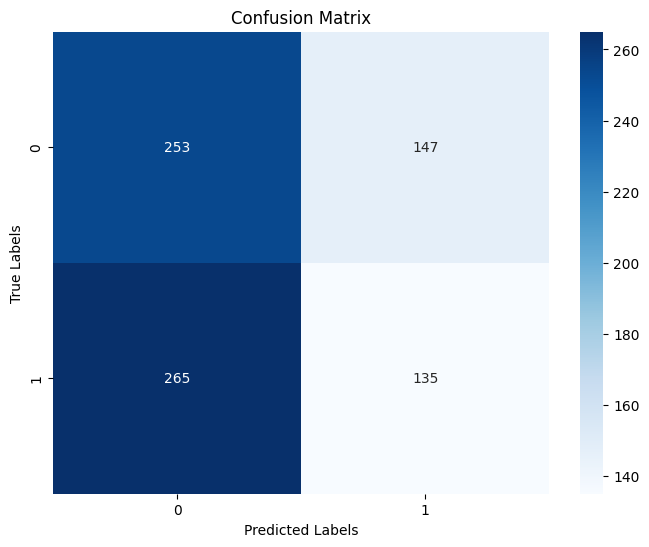

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Use cross_val_predict to obtain predicted labels for each sample using cross-validation
predicted_labels = cross_val_predict(svm_classifier, X, y_encoded, cv=kfold)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_encoded, predicted_labels)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import cv2
import numpy as np
import os
from skimage import feature
import joblib

# Read the unseen image
unseen_image_path = '/content/drive/MyDrive/filtered/001_CNV.jpg'
unseen_image = cv2.imread(unseen_image_path)

# Apply minimum filter to the unseen image
kernel_size = 3
filtered_image = cv2.erode(unseen_image, np.ones((kernel_size, kernel_size), np.uint8))

# Compute LBP features for the filtered image
gray_filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)
lbp = feature.local_binary_pattern(gray_filtered_image, P=8, R=1, method='uniform')
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 10), range=(0, 9))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)

# Reshape the feature vector
processed_image_features = hist.reshape(1, -1)


# Predict the class label of the unseen image
predicted_class = svm_classifier.predict(processed_image_features)

# Print the predicted class label
print("Predicted Class Label:", predicted_class)

Predicted Class Label: [0]


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

num_folds = 5
rf_classifier = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)
rf_classifier.fit(X, y_encoded)

Cross-validation scores: [1.      1.      0.975   1.      0.96875]
Mean Accuracy: 0.9887499999999999


RandomForestClassifier()

In [ ]:
import cv2
import numpy as np
import os
from skimage import feature
import joblib

# Read the unseen image
unseen_image_path = '/content/drive/MyDrive/Eye/CNV/1/023_Normal.jpg'
unseen_image = cv2.imread(unseen_image_path)

# Compute LBP features for the filtered image
gray_filtered_image = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)
lbp = feature.local_binary_pattern(gray_filtered_image, P=8, R=1, method='uniform')
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 10), range=(0, 9))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)

# Predict the class label of the unseen image
predicted_class = rf_classifier.predict(hist.reshape(1, -1))

# Print the predicted class label
print("Predicted Class Label:", predicted_class)


Predicted Class Label: [0]


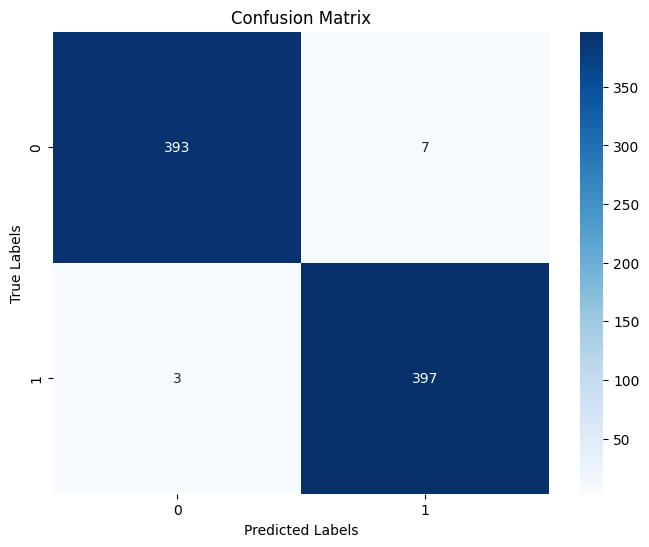

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Use cross_val_predict to obtain predicted labels for each sample using cross-validation
predicted_labels = cross_val_predict(rf_classifier, X, y_encoded, cv=kfold)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_encoded, predicted_labels)

# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the SVM classifier with RBF kernel
svm_classifier_rbf = SVC(kernel='rbf')

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(svm_classifier_rbf, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with RBF kernel:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy with RBF kernel:", mean_accuracy)
print("Standard Deviation of Accuracy with RBF kernel:", std_dev_accuracy)

Cross-validation scores with RBF kernel: [0.4875  0.48125 0.45    0.45    0.55   ]
Mean Accuracy with RBF kernel: 0.48375
Standard Deviation of Accuracy with RBF kernel: 0.036571847095819496


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the SVM classifier with Polynomial kernel
svm_classifier_poly = SVC(kernel='poly')

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_poly = cross_val_score(svm_classifier_poly, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Polynomial kernel:", cv_scores_poly)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_poly = cv_scores_poly.mean()
std_dev_accuracy_poly = cv_scores_poly.std()
print("Mean Accuracy with Polynomial kernel:", mean_accuracy_poly)
print("Standard Deviation of Accuracy with Polynomial kernel:", std_dev_accuracy_poly)


Cross-validation scores with Polynomial kernel: [0.4875  0.51875 0.45    0.45    0.5125 ]
Mean Accuracy with Polynomial kernel: 0.48375
Standard Deviation of Accuracy with Polynomial kernel: 0.029474565306378986


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the SVM classifier with Polynomial kernel
svm_classifier_poly = SVC(kernel='sigmoid')

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_poly = cross_val_score(svm_classifier_poly, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Polynomial kernel:", cv_scores_poly)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_poly = cv_scores_poly.mean()
std_dev_accuracy_poly = cv_scores_poly.std()
print("Mean Accuracy with Polynomial kernel:", mean_accuracy_poly)
print("Standard Deviation of Accuracy with Polynomial kernel:", std_dev_accuracy_poly)


Cross-validation scores with Polynomial kernel: [0.48125 0.45625 0.45    0.43125 0.49375]
Mean Accuracy with Polynomial kernel: 0.4625
Standard Deviation of Accuracy with Polynomial kernel: 0.0223606797749979


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the SVM classifier with Polynomial kernel
svm_classifier_poly = SVC(kernel='linear')

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_poly = cross_val_score(svm_classifier_poly, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Polynomial kernel:", cv_scores_poly)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_poly = cv_scores_poly.mean()
std_dev_accuracy_poly = cv_scores_poly.std()
print("Mean Accuracy with Polynomial kernel:", mean_accuracy_poly)
print("Standard Deviation of Accuracy with Polynomial kernel:", std_dev_accuracy_poly)


Cross-validation scores with Polynomial kernel: [0.5     0.50625 0.45    0.43125 0.525  ]
Mean Accuracy with Polynomial kernel: 0.48250000000000004
Standard Deviation of Accuracy with Polynomial kernel: 0.035663356544217754


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_lr = cross_val_score(logistic_regression_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Logistic Regression:", cv_scores_lr)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_lr = cv_scores_lr.mean()
std_dev_accuracy_lr = cv_scores_lr.std()
print("Mean Accuracy with Logistic Regression:", mean_accuracy_lr)
print("Standard Deviation of Accuracy with Logistic Regression:", std_dev_accuracy_lr)


Cross-validation scores with Logistic Regression: [0.525   0.475   0.55625 0.44375 0.53125]
Mean Accuracy with Logistic Regression: 0.50625
Standard Deviation of Accuracy with Logistic Regression: 0.04088856808449033


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with XGBoost:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy with XGBoost:", mean_accuracy)
print("Standard Deviation of Accuracy with XGBoost:", std_dev_accuracy)


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Define the number of neighbors for KNN
num_neighbors = 5

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=num_neighbors)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with KNN:", cv_scores_knn)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_knn = cv_scores_knn.mean()
std_dev_accuracy_knn = cv_scores_knn.std()
print("Mean Accuracy with KNN:", mean_accuracy_knn)
print("Standard Deviation of Accuracy with KNN:", std_dev_accuracy_knn)


Cross-validation scores with KNN: [0.95625 0.9625  0.96875 0.95625 0.90625]
Mean Accuracy with KNN: 0.95
Standard Deviation of Accuracy with KNN: 0.0223606797749979


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Naive Bayes:", cv_scores_nb)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_nb = cv_scores_nb.mean()
std_dev_accuracy_nb = cv_scores_nb.std()
print("Mean Accuracy with Naive Bayes:", mean_accuracy_nb)
print("Standard Deviation of Accuracy with Naive Bayes:", std_dev_accuracy_nb)

Cross-validation scores with Naive Bayes: [0.54375 0.4625  0.55    0.525   0.58125]
Mean Accuracy with Naive Bayes: 0.5325000000000001
Standard Deviation of Accuracy with Naive Bayes: 0.03940970692608612


### **GLCM**


In [ ]:
import cv2
import numpy as np
import os
from skimage.feature import greycomatrix, greycoprops  # Import graycoprops instead of graycoprops

# Define the directory containing the filtered images
filtered_data_dir = '/content/drive/MyDrive/minfiltered'

# List to store GLCM features
glcm_features = []

# Iterate over the rows in the 'Directory' column of sampled_data
for index, row in both.iterrows():
    # Read the filtered image
    filtered_img_path = os.path.join(filtered_data_dir, os.path.basename(row['Directory']))
    filtered_img = cv2.imread(filtered_img_path)

    # Check if the filtered image was successfully loaded
    if filtered_img is not None:
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)

        # Compute GLCM
        glcm = greycomatrix(gray_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

        # Compute GLCM properties
        contrast = greycoprops(glcm, 'contrast')  # Use greycoprops instead of graycoprops
        dissimilarity = greycoprops(glcm, 'dissimilarity')
        homogeneity = greycoprops(glcm, 'homogeneity')
        energy = greycoprops(glcm, 'energy')
        correlation = greycoprops(glcm, 'correlation')

        # Append GLCM properties to the list
        glcm_features.append([contrast[0, 0], dissimilarity[0, 0], homogeneity[0, 0], energy[0, 0], correlation[0, 0]])

# Convert the list of GLCM features to a numpy array
glcm_features = np.array(glcm_features)

# Display sample GLCM features
print("GLCM features shape:", glcm_features.shape)
print("Sample GLCM features:")
print(glcm_features[:5])


In [ ]:
# Assuming you have your target vector y as a pandas Series
y = both['Label']

# Encode the target vector
# Assign 0 for DRUSEN, 1 for CNV, and 2 for NORMAL
y_encoded = y.map({'CNV': 0, 'DRUSEN': 1})
X = glcm_features

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5

# Initialize the SVM classifier
svm_classifier = SVC()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
print("Cross-validation scores:", cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.60625 0.53125 0.54375 0.58125 0.54375]
Mean Accuracy: 0.56125


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5

# Initialize the SVM classifier
svm_classifier = SVC(kernel="linear")

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
print("Cross-validation scores:", cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.55625 0.5375  0.525   0.53125 0.54375]
Mean Accuracy: 0.53875


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Naive Bayes:", cv_scores_nb)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_nb = cv_scores_nb.mean()
std_dev_accuracy_nb = cv_scores_nb.std()
print("Mean Accuracy with Naive Bayes:", mean_accuracy_nb)
print("Standard Deviation of Accuracy with Naive Bayes:", std_dev_accuracy_nb)

Cross-validation scores with Naive Bayes: [0.64375 0.58125 0.59375 0.60625 0.64375]
Mean Accuracy with Naive Bayes: 0.6137499999999999
Standard Deviation of Accuracy with Naive Bayes: 0.02573907535246751


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Define the number of neighbors for KNN
num_neighbors = 5

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=num_neighbors)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with KNN:", cv_scores_knn)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_knn = cv_scores_knn.mean()
std_dev_accuracy_knn = cv_scores_knn.std()
print("Mean Accuracy with KNN:", mean_accuracy_knn)
print("Standard Deviation of Accuracy with KNN:", std_dev_accuracy_knn)


Cross-validation scores with KNN: [0.925   0.9625  0.94375 0.91875 0.90625]
Mean Accuracy with KNN: 0.93125
Standard Deviation of Accuracy with KNN: 0.019764235376052378


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with XGBoost:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy with XGBoost:", mean_accuracy)
print("Standard Deviation of Accuracy with XGBoost:", std_dev_accuracy)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_lr = cross_val_score(logistic_regression_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Logistic Regression:", cv_scores_lr)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_lr = cv_scores_lr.mean()
std_dev_accuracy_lr = cv_scores_lr.std()
print("Mean Accuracy with Logistic Regression:", mean_accuracy_lr)
print("Standard Deviation of Accuracy with Logistic Regression:", std_dev_accuracy_lr)

Cross-validation scores with Logistic Regression: [0.575   0.5375  0.53125 0.53125 0.55625]
Mean Accuracy with Logistic Regression: 0.5462499999999999
Standard Deviation of Accuracy with Logistic Regression: 0.01704772712123231


### **HOG**

In [ ]:
filtered_data_dir = '/content/drive/MyDrive/Eye/drusenFiltered/'
filtered_images_dir = '/content/drive/MyDrive/minfiltered'
def extract_hog_features(images, do_otsu=True):
    hog_features = []
    hog_images = []
    thresholded_images = []
    for gray_image in images:
        if do_otsu:
            threshold_value = threshold_otsu(gray_image)
            threshold_image = gray_image > threshold_value
            thresholded_images.append(threshold_image)

        # Calculate HOG features
        features, hog_image = hog(threshold_image if do_otsu else gray_image,
                                  visualize=True, multichannel=False,
                                  pixels_per_cell=(8, 8), cells_per_block=(2, 2))

        # Enhance the contrast of the HOG image
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        hog_images.append(hog_image_rescaled)
        hog_features.append(features)

    return np.array(hog_features), hog_images, thresholded_images
# Load filtered images and convert to grayscale
filtered_images = []
gray_images = []
for index, row in both.iterrows():
    img_path = os.path.join(filtered_images_dir, os.path.basename(row['Directory']))
    img = cv2.imread(img_path)
gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]

# Extract HOG features
hog_features, hog_images, _ = extract_hog_features(gray_images)

<ipython-input-22-3898fa036f31>:14: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(threshold_image if do_otsu else gray_image,


In [ ]:
# Assuming you have your target vector y as a pandas Series
y = both['Label']

# Encode the target vector
# Assign 0 for DRUSEN, 1 for CNV, and 2 for NORMAL
y_encoded = y.map({'CNV': 0, 'DRUSEN': 1})
X = hog_features

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5

# Initialize the SVM classifier
svm_classifier = SVC(kernel="linear")

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
print("Cross-validation scores:", cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.8    0.6625 0.8    0.775  0.8   ]
Mean Accuracy: 0.7675000000000001


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_lr = cross_val_score(logistic_regression_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Logistic Regression:", cv_scores_lr)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_lr = cv_scores_lr.mean()
std_dev_accuracy_lr = cv_scores_lr.std()
print("Mean Accuracy with Logistic Regression:", mean_accuracy_lr)
print("Standard Deviation of Accuracy with Logistic Regression:", std_dev_accuracy_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores with Logistic Regression: [0.8     0.65    0.80625 0.7875  0.8    ]
Mean Accuracy with Logistic Regression: 0.76875
Standard Deviation of Accuracy with Logistic Regression: 0.05968668193156661


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with XGBoost:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy with XGBoost:", mean_accuracy)
print("Standard Deviation of Accuracy with XGBoost:", std_dev_accuracy)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Define the number of neighbors for KNN
num_neighbors = 5

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=num_neighbors)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with KNN:", cv_scores_knn)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_knn = cv_scores_knn.mean()
std_dev_accuracy_knn = cv_scores_knn.std()
print("Mean Accuracy with KNN:", mean_accuracy_knn)
print("Standard Deviation of Accuracy with KNN:", std_dev_accuracy_knn)


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Naive Bayes:", cv_scores_nb)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_nb = cv_scores_nb.mean()
std_dev_accuracy_nb = cv_scores_nb.std()
print("Mean Accuracy with Naive Bayes:", mean_accuracy_nb)
print("Standard Deviation of Accuracy with Naive Bayes:", std_dev_accuracy_nb)

# **DRUSEN**

### **preprocessing and importing data**

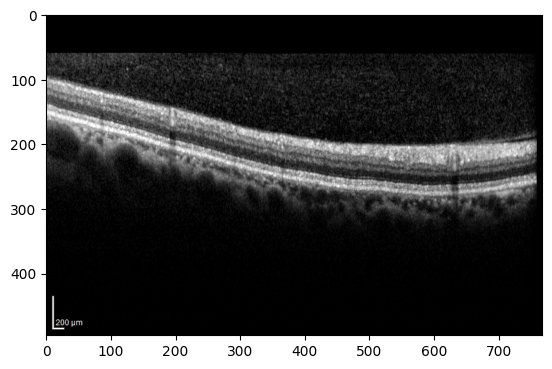

In [ ]:
import cv2
images=[]
for i in drusen['Directory']:
  img = cv2.imread(data_dir+i)
  images.append(img)
plt.imshow(img, cmap='gray')

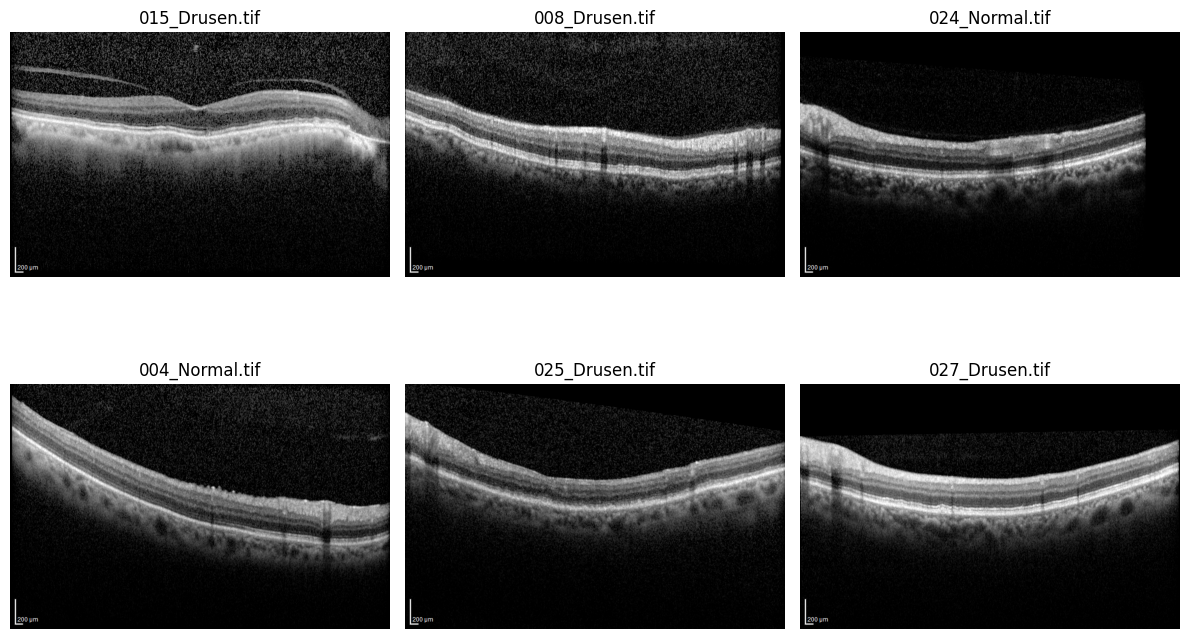

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

# Check if the number of images is less than 6
if len(drusen) < 6:
    raise ValueError("Number of images is less than 6")

# Randomly select 6 unique indices
random_indices = random.sample(range(len(drusen)), 6)

# Create a figure for displaying images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Iterate over the randomly selected indices
for i, idx in enumerate(random_indices):
    # Get the image path from the 'Directory' column
    file_path = drusen.iloc[idx]['Directory']

    # Read the image
    img = cv2.imread(os.path.join(data_dir, file_path))  # Adjust to the correct data directory

    # Check if the image was read successfully
    if img is None:
        print(f"Error: Unable to read image '{file_path}'")
        continue

    # Display the image along with its file name
    ax = axes[i // 3, i % 3]
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(os.path.basename(file_path))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np
import os
import pandas as pd

# Function to apply minimum filter to an image
def apply_minimum_filter(image, kernel_size):
    return cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))

# Function to apply minimum filter to a dataset of images
def apply_minimum_filter_to_dataset(images, kernel_size):
    filtered_images = []
    for image in images:
        filtered_image = apply_minimum_filter(image, kernel_size)
        filtered_images.append(filtered_image)
    return filtered_images
images = []

# Directory to save filtered images
filtered_data_dir = '/content/drive/MyDrive/drusenFilteredImage/'
os.makedirs(filtered_data_dir, exist_ok=True)

# Define the kernel size for the minimum filter
kernel_size = 3

# Read and apply minimum filter to each image in the sampled_data
for index, row in drusen.iterrows():
    # Read the image
    img_path = os.path.join(data_dir, row['Directory'])
    img = cv2.imread(img_path)

    # Check if the image was successfully loaded
    if img is not None:
        # Apply minimum filter
        filtered_img = apply_minimum_filter(img, kernel_size)

        # Save filtered image with the same filename
        filename = os.path.basename(row['Directory'])
        cv2.imwrite(os.path.join(filtered_data_dir, filename), filtered_img)

        print(f"Filtered image saved: {filename}")
    else:
        print(f"Error: Unable to read image '{img_path}'")

print("All images filtered and saved successfully.")


Filtered image saved: 000_Normal.jpg
Filtered image saved: 008_Normal.tif
Filtered image saved: 024_Normal.tif
Filtered image saved: 030_Normal.tif
Filtered image saved: 005_Normal.tif
Filtered image saved: 028_Normal.tif
Filtered image saved: 004_Normal.jpg
Filtered image saved: 001_Normal.tif
Filtered image saved: 006_Normal.tif
Filtered image saved: 028_Normal.jpg
Filtered image saved: 030_Normal.tif
Filtered image saved: 004_Normal.tif
Filtered image saved: 003_Normal.tif
Filtered image saved: 000_Normal.tif
Filtered image saved: 004_Normal.tif
Filtered image saved: 022_NOrmal.tif
Filtered image saved: 026_Normal.tif
Filtered image saved: 027_Normal.tif
Filtered image saved: 027_Normal.tif
Filtered image saved: 020_Normal.tif
Filtered image saved: 026_Normal.tif
Filtered image saved: 004_Normal.tif
Filtered image saved: 001_Normal.tif
Filtered image saved: 028_Normal.tif
Filtered image saved: 001_Normal.tif
Filtered image saved: 027_Normal.jpg
Filtered image saved: 000_Normal.tif
F

### **lbp**

In [ ]:
import cv2
import numpy as np
import os
from skimage import feature

# Define the directory containing the filtered images
filtered_data_dir = '/content/drive/MyDrive/drusenFilteredImage/'

# List to store LBP features
lbp_features = []

# Iterate over the rows in the 'Directory' column of cnv
for index, row in drusen.iterrows():
    # Read the filtered image
    filtered_img_path = os.path.join(filtered_data_dir, os.path.basename(row['Directory']))
    filtered_img = cv2.imread(filtered_img_path)

    # Check if the filtered image was successfully loaded
    if filtered_img is not None:
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)

        # Compute LBP features
        lbp = feature.local_binary_pattern(gray_img, P=8, R=1, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 10), range=(0, 9))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)

        # Append LBP features to the list
        lbp_features.append(hist)

# Convert the list of LBP features to a numpy array
lbp_features = np.array(lbp_features)

# Display sample LBP features
print("LBP features shape:", lbp_features.shape)
print("Sample LBP features:")
print(lbp_features[:5])

LBP features shape: (1000, 9)
Sample LBP features:
[[0.03752678 0.06029223 0.03160702 0.06983734 0.05779045 0.0629594
  0.02949639 0.01966513 0.63082525]
 [0.01537561 0.03603568 0.01360625 0.04742629 0.04249622 0.09991127
  0.03537939 0.01295258 0.69681672]
 [0.01579039 0.03032332 0.00904895 0.03114762 0.01957325 0.05396295
  0.02206454 0.00850029 0.80958869]
 [0.01512884 0.03598843 0.0144253  0.04923765 0.04873887 0.10770277
  0.03943002 0.01450668 0.67484144]
 [0.01150874 0.02789504 0.00988901 0.03771316 0.03250483 0.08350659
  0.02882697 0.01055318 0.75760249]]


In [ ]:
# Assuming you have your target vector y as a pandas Series
y = cnv['Label']

# Encode the target vector
# Assign 0 for DRUSEN, 1 for CNV, and 2 for NORMAL
y_encoded = y.map({'CNV': 0, 'NORMAL': 1})
X = lbp_features

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5

# Initialize the SVM classifier
svm_classifier = SVC(kernel="linear")

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
print("Cross-validation scores:", cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.505 0.44  0.495 0.445 0.57 ]
Mean Accuracy: 0.491


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Naive Bayes:", cv_scores_nb)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_nb = cv_scores_nb.mean()
std_dev_accuracy_nb = cv_scores_nb.std()
print("Mean Accuracy with Naive Bayes:", mean_accuracy_nb)
print("Standard Deviation of Accuracy with Naive Bayes:", std_dev_accuracy_nb)

Cross-validation scores with Naive Bayes: [0.55  0.52  0.445 0.525 0.505]
Mean Accuracy with Naive Bayes: 0.509
Standard Deviation of Accuracy with Naive Bayes: 0.0351283361405006


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Define the number of neighbors for KNN
num_neighbors = 5

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=num_neighbors)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with KNN:", cv_scores_knn)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_knn = cv_scores_knn.mean()
std_dev_accuracy_knn = cv_scores_knn.std()
print("Mean Accuracy with KNN:", mean_accuracy_knn)
print("Standard Deviation of Accuracy with KNN:", std_dev_accuracy_knn)

Cross-validation scores with KNN: [0.96  0.94  0.965 0.96  0.975]
Mean Accuracy with KNN: 0.96
Standard Deviation of Accuracy with KNN: 0.01140175425099139


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with XGBoost:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy with XGBoost:", mean_accuracy)
print("Standard Deviation of Accuracy with XGBoost:", std_dev_accuracy)

Cross-validation scores with XGBoost: [0.985 0.995 0.995 0.995 0.99 ]
Mean Accuracy with XGBoost: 0.992
Standard Deviation of Accuracy with XGBoost: 0.0040000000000000036


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_lr = cross_val_score(logistic_regression_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Logistic Regression:", cv_scores_lr)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_lr = cv_scores_lr.mean()
std_dev_accuracy_lr = cv_scores_lr.std()
print("Mean Accuracy with Logistic Regression:", mean_accuracy_lr)
print("Standard Deviation of Accuracy with Logistic Regression:", std_dev_accuracy_lr)

Cross-validation scores with Logistic Regression: [0.555 0.54  0.475 0.49  0.535]
Mean Accuracy with Logistic Regression: 0.5190000000000001
Standard Deviation of Accuracy with Logistic Regression: 0.030886890422961024


### **glcm**

In [ ]:
import cv2
import numpy as np
import os
from skimage.feature import greycomatrix, greycoprops  # Import graycoprops instead of graycoprops

# Define the directory containing the filtered images
filtered_data_dir = '/content/drive/MyDrive/drusenFilteredImage/'

# List to store GLCM features
glcm_features = []

# Iterate over the rows in the 'Directory' column of sampled_data
for index, row in drusen.iterrows():
    # Read the filtered image
    filtered_img_path = os.path.join(filtered_data_dir, os.path.basename(row['Directory']))
    filtered_img = cv2.imread(filtered_img_path)

    # Check if the filtered image was successfully loaded
    if filtered_img is not None:
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)

        # Compute GLCM
        glcm = greycomatrix(gray_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

        # Compute GLCM properties
        contrast = greycoprops(glcm, 'contrast')  # Use greycoprops instead of graycoprops
        dissimilarity = greycoprops(glcm, 'dissimilarity')
        homogeneity = greycoprops(glcm, 'homogeneity')
        energy = greycoprops(glcm, 'energy')
        correlation = greycoprops(glcm, 'correlation')

        # Append GLCM properties to the list
        glcm_features.append([contrast[0, 0], dissimilarity[0, 0], homogeneity[0, 0], energy[0, 0], correlation[0, 0]])

# Convert the list of GLCM features to a numpy array
glcm_features = np.array(glcm_features)

# Display sample GLCM features
print("GLCM features shape:", glcm_features.shape)
print("Sample GLCM features:")
print(glcm_features[:5])


In [ ]:
# Assuming you have your target vector y as a pandas Series
y = cnv['Label']

# Encode the target vector
# Assign 0 for DRUSEN, 1 for CNV, and 2 for NORMAL
y_encoded = y.map({'CNV': 0, 'NORMAL': 1})
X =glcm_features

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5

# Initialize the SVM classifier
svm_classifier = SVC(kernel="sigmoid")

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
print("Cross-validation scores:", cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.55 0.42 0.49 0.43 0.51]
Mean Accuracy: 0.48


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_lr = cross_val_score(logistic_regression_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Logistic Regression:", cv_scores_lr)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_lr = cv_scores_lr.mean()
std_dev_accuracy_lr = cv_scores_lr.std()
print("Mean Accuracy with Logistic Regression:", mean_accuracy_lr)
print("Standard Deviation of Accuracy with Logistic Regression:", std_dev_accuracy_lr)

Cross-validation scores with Logistic Regression: [0.55  0.505 0.565 0.475 0.525]
Mean Accuracy with Logistic Regression: 0.524
Standard Deviation of Accuracy with Logistic Regression: 0.032


In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with XGBoost:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy with XGBoost:", mean_accuracy)
print("Standard Deviation of Accuracy with XGBoost:", std_dev_accuracy)

Cross-validation scores with XGBoost: [0.995 0.985 0.995 1.    0.995]
Mean Accuracy with XGBoost: 0.994
Standard Deviation of Accuracy with XGBoost: 0.00489897948556636


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

# Define the number of neighbors for KNN
num_neighbors = 5

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=num_neighbors)

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_knn = cross_val_score(knn_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with KNN:", cv_scores_knn)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_knn = cv_scores_knn.mean()
std_dev_accuracy_knn = cv_scores_knn.std()
print("Mean Accuracy with KNN:", mean_accuracy_knn)
print("Standard Deviation of Accuracy with KNN:", std_dev_accuracy_knn)

Cross-validation scores with KNN: [0.955 0.94  0.96  0.945 0.95 ]
Mean Accuracy with KNN: 0.95
Standard Deviation of Accuracy with KNN: 0.007071067811865481


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Naive Bayes:", cv_scores_nb)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_nb = cv_scores_nb.mean()
std_dev_accuracy_nb = cv_scores_nb.std()
print("Mean Accuracy with Naive Bayes:", mean_accuracy_nb)
print("Standard Deviation of Accuracy with Naive Bayes:", std_dev_accuracy_nb)

Cross-validation scores with Naive Bayes: [0.585 0.53  0.54  0.63  0.565]
Mean Accuracy with Naive Bayes: 0.5700000000000001
Standard Deviation of Accuracy with Naive Bayes: 0.03563705936241091


### **hog**

In [ ]:
import cv2
import numpy as np
import os
from skimage.feature import hog
from skimage import exposure

# Define the directory containing the filtered images
filtered_data_dir = '/content/drive/MyDrive/drusenFilteredImage/'

# List to store HOG features
hog_features = []

# Iterate over the rows in the 'Directory' column of sampled_data
for index, row in drusen.iterrows():
    # Read the filtered image
    filtered_img_path = os.path.join(filtered_data_dir, os.path.basename(row['Directory']))
    filtered_img = cv2.imread(filtered_img_path)

    # Check if the filtered image was successfully loaded
    if filtered_img is not None:
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2GRAY)

        # Compute HOG features
        features, hog_image = hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                                   cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

        # Rescale histogram for better display
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

        # Append HOG features to the list
        hog_features.append(features)

# Convert the list of HOG features to a numpy array
hog_features = np.array(hog_features)

# Display sample HOG features
print("HOG features shape:", hog_features.shape)
print("Sample HOG features:")
print(hog_features[:5])


HOG features shape: (1000, 208620)
Sample HOG features:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.14629009 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
# Assuming you have your target vector y as a pandas Series
y = cnv['Label']

# Encode the target vector
# Assign 0 for DRUSEN, 1 for CNV, and 2 for NORMAL
y_encoded = y.map({'CNV': 0, 'NORMAL': 1})
X = hog_features

NameError: name 'hog_features' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5

# Initialize the SVM classifier
svm_classifier = SVC(kernel="sigmoid")

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
print("Cross-validation scores:", cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.975 0.905 0.935 0.935 0.95 ]
Mean Accuracy: 0.9400000000000001


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier (Gaussian Naive Bayes)
nb_classifier = GaussianNB()

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_nb = cross_val_score(nb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Naive Bayes:", cv_scores_nb)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_nb = cv_scores_nb.mean()
std_dev_accuracy_nb = cv_scores_nb.std()
print("Mean Accuracy with Naive Bayes:", mean_accuracy_nb)
print("Standard Deviation of Accuracy with Naive Bayes:", std_dev_accuracy_nb)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with XGBoost:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy = cv_scores.mean()
std_dev_accuracy = cv_scores.std()
print("Mean Accuracy with XGBoost:", mean_accuracy)
print("Standard Deviation of Accuracy with XGBoost:", std_dev_accuracy)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_scores_lr = cross_val_score(logistic_regression_classifier, X, y_encoded, cv=kfold)

# Print the cross-validation scores
print("Cross-validation scores with Logistic Regression:", cv_scores_lr)

# Calculate and print the mean accuracy and standard deviation of the cross-validation scores
mean_accuracy_lr = cv_scores_lr.mean()
std_dev_accuracy_lr = cv_scores_lr.std()
print("Mean Accuracy with Logistic Regression:", mean_accuracy_lr)
print("Standard Deviation of Accuracy with Logistic Regression:", std_dev_accuracy_lr)

# **Just **

In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# Hog Feature Function
def extract_hog_features(images,do_otsu):
    hog_features = []
    hog_images = []
    thresholded_images = []
    for gray_image in images:
        # Convert image to grayscale (if it's not already)
        # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if(do_otsu==True):
          threshold_value = threshold_otsu(gray_image)
          threshold_image = gray_image>threshold_value
          thresholded_images.append(threshold_image)
        # Calculate HOG features
        features, hog_image = hog(threshold_image if do_otsu==True else gray_image, visualize=True,multichannel=False,pixels_per_cell=(8, 8),cells_per_block=(2, 2))

        # Enhance the contrast of the HOG image for better visualization
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        hog_images.append(hog_image)
        hog_features.append(features)

    return np.array(hog_features),hog_images,thresholded_images

In [ ]:
cnv_normal_dataframe = create_cnv_normal_data(cnv_data, normal_data, 225, 42)
print(cnv_normal_dataframe.head())

In [ ]:
X_cnv_hog,hog_image_cnv,thresholded_image_cnv = extract_hog_features(X_cnv_patient_filtered,do_otsu=True)

NameError: name 'X_cnv_patient_filtered' is not defined

In [ ]:
def split_input_output_data(data):
  X= drusen['Directory']
  y = drusen['Label']
  l = {'NORMAL':0,'DRUSEN':1,'CNV':2}
  y_patient = y.map(l)
  return X, y, y_patient

In [ ]:
# Assuming you have your target vector y as a pandas Series
y = drusen['Label']

# Encode the target vector
# Assign 0 for DRUSEN, 1 for CNV, and 2 for NORMAL
y_encoded = y.map({'DRUSEN': 0, 'NORMAL': 1})
X = extract_hog_features

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
num_folds = 5

# Initialize the SVM classifier
svm_classifier = SVC(kernel="sigmoid")

# Initialize the k-fold cross-validation generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, X, y_encoded, cv=kfold)
print("Cross-validation scores:", cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy:", mean_accuracy)

TypeError: Singleton array array(<function extract_hog_features at 0x78556a80fd00>, dtype=object) cannot be considered a valid collection.